In [1]:
## settings 
import numpy as np
import matplotlib.pylab as plt
import scipy, scipy.stats
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 4.0)

$\usepackage{amssymb} \newcommand{\R}{\mathbb{R}} \newcommand{\vx}{\vec{x}} \newcommand{\vw}{\vec{w}}$

## 3.6 PCA via Singular Value Decomposition (SVD)

_Singular Value Decomposition_ (SVD) allows an efficient computation of the PCA, so to say: PCA in a single execution step.

The SVD of a $N \times d$ matrix $X$ finds the decomposition into a product of three matrices 
$$
  X = V S U^\tau~,
$$
<img src="images/SVD-matrices.png" witdh="50%">
where
\begin{eqnarray}
U & = & d \times d\text{-orthogonal matrix}\\
S & = & \text{diag}(s_1,\ldots,s_d)~\text{diagonal matrix of singualar values of}~X\\
V & = & \text{Matrix of}~d~\text{pairwise orthonormal columns} \in\R^N
\end{eqnarray}

For the PCA we here take as input the **centered** data matrix 
$X = (\vec{x}^1,\ldots, \vec{x}^\alpha)^\tau$
and interprete the decomposition as follows:

1. The columns $\hat u_i$ of $U$ are the eigenvectors of the covariance matrix $\hat C$ of the data
 * because
$$
	(N-1)\hat C = \sum\limits_{\alpha=1}^N \vec{x}^\alpha\vec{x}^{\alpha\tau} 
	= X^\tau X = US\underbrace{V^\tau V}_{I_d}SU^\tau = US^2U^\tau
$$
 * Since $\hat C$ has the eigenvalue decomposition $\hat C = U \hat DU^\tau$, it is immediately obvious that in addition it is $\lambda_i = s_i^2/(N-1)$.
 * Note: if the mean is not estimated from the data, we can use $N$ instead of $N-1$.
2. The $k$th column of matrix $V\cdot S$ contains the projection indices for the $k$th principal component 
$$
y_k^\alpha = \hat u_k^\tau \vec{x}^\alpha = \vec{x}^{\alpha \tau} \hat u_k = V_{\alpha k}S_{kk} 
$$
 * Reordering the SVD-equation gives $XU = VS$ and thus directly the above statement. 

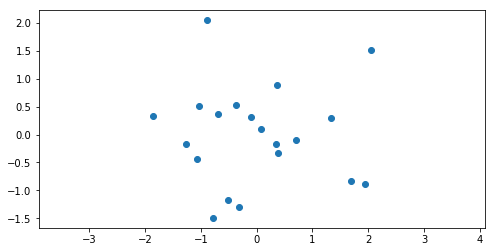

In [12]:
# create mean-centered data
N, dim = 20, 3
data = np.random.randn(N, dim)
data = data - np.mean(data, 0)
plt.plot(data[:,0], data[:,1], 'o'); plt.axis('equal');

In [18]:
# compute SVD
u, s, vh = np.linalg.svd(data, full_matrices=False)
print("singualar values", np.sort(s))

singualar values [ 3.6657852   4.50154667  5.02182538]


In [19]:
# compute eigenvalues via C and diag
C = np.cov(data.T)
eigvals, eigvecs = np.linalg.eig(C)
print("eigenvalues:", np.sort(eigvals))

eigenvalues: [ 0.70726216  1.06652223  1.32730159]


In [26]:
# check difference with the 1/(N-1) normalization
print("difference is approx. 0:", np.sort(eigvals) - np.sort(s)**2/(N-1))

difference is approx. 0: [ -3.33066907e-16  -2.22044605e-16   4.44089210e-16]
